In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key
print(api_key)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

25bc90a1196e6f153eece0bc0b0fc9eb


In [18]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

In [19]:
cities[0:5]

['quisqueya', 'sorland', 'busselton', 'bluff', 'punta arenas']

In [20]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb'

In [21]:
print("Beginning Data Retrieval\n------------------------------------------")

weather_data = []
record_counter = 0

for city in cities:
    response = requests.get(f"{url}&q={city}").json()
    print(f"Processing Record {record_counter}|{city}")
    print(f"{url}&q={city}")
    
    weather_data.append(response)
    
    record_counter += 1
    time.sleep(3)
    
print("------------------------------------------")
print("Data Retrieval Complete\n------------------------------------------")

Beginning Data Retrieval
------------------------------------------
Processing Record 0|quisqueya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=quisqueya
Processing Record 1|sorland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=sorland
Processing Record 2|busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=busselton
Processing Record 3|bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=bluff
Processing Record 4|punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=punta arenas
Processing Record 5|castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=castro
Processing Record 6|hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperi

Processing Record 58|frontera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=frontera
Processing Record 59|mapastepec
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=mapastepec
Processing Record 60|takhtamygda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=takhtamygda
Processing Record 61|tsihombe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=tsihombe
Processing Record 62|puerto ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=puerto ayora
Processing Record 63|vaitupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=vaitupu
Processing Record 64|ushtobe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=

Processing Record 116|necochea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=necochea
Processing Record 117|jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=jamestown
Processing Record 118|cape town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=cape town
Processing Record 119|asau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=asau
Processing Record 120|dabat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=dabat
Processing Record 121|vostok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=vostok
Processing Record 122|bembereke
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=bembereke
Processing 

Processing Record 173|buenos aires
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=buenos aires
Processing Record 174|dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=dikson
Processing Record 175|roma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=roma
Processing Record 176|tumannyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=tumannyy
Processing Record 177|hof
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=hof
Processing Record 178|luderitz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=luderitz
Processing Record 179|durham
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=durham
Processing Record

Processing Record 231|fayaoue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=fayaoue
Processing Record 232|umm durman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=umm durman
Processing Record 233|tezu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=tezu
Processing Record 234|baksheyevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=baksheyevo
Processing Record 235|lompoc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=lompoc
Processing Record 236|airai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=airai
Processing Record 237|veinticinco de mayo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=veinticin

Processing Record 288|yarmouth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=yarmouth
Processing Record 289|kunming
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=kunming
Processing Record 290|portree
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=portree
Processing Record 291|hirara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=hirara
Processing Record 292|requena
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=requena
Processing Record 293|bonavista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=bonavista
Processing Record 294|oranjemund
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=oranjemund
Pro

Processing Record 346|zyryanka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=zyryanka
Processing Record 347|hopkinsville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=hopkinsville
Processing Record 348|kutum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=kutum
Processing Record 349|barbar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=barbar
Processing Record 350|saint george
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=saint george
Processing Record 351|ranchi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=ranchi
Processing Record 352|gdynia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=gdynia
P

Processing Record 404|patharia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=patharia
Processing Record 405|sisimiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=sisimiut
Processing Record 406|catalina foothills
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=catalina foothills
Processing Record 407|los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=los llanos de aridane
Processing Record 408|urucui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=urucui
Processing Record 409|nizhneyansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=nizhneyansk
Processing Record 410|byron bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&

Processing Record 461|komsomolskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=komsomolskiy
Processing Record 462|ugoofaaru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=ugoofaaru
Processing Record 463|shumyachi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=shumyachi
Processing Record 464|maragogi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=maragogi
Processing Record 465|juegang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=juegang
Processing Record 466|te anau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=te anau
Processing Record 467|meiganga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=

Processing Record 519|gambiran
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=gambiran
Processing Record 520|rawson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=rawson
Processing Record 521|hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=hasaki
Processing Record 522|petropavlovsk-kamchatskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=petropavlovsk-kamchatskiy
Processing Record 523|nikel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=nikel
Processing Record 524|barawe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=barawe
Processing Record 525|skagastrond
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc

Processing Record 576|buraydah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=buraydah
Processing Record 577|almeirim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=almeirim
Processing Record 578|maceio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=maceio
Processing Record 579|santa eulalia del rio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=santa eulalia del rio
Processing Record 580|haicheng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=haicheng
Processing Record 581|taltal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=taltal
Processing Record 582|boguchany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc

In [23]:
weather_data[10]

{'coord': {'lon': -9.73, 'lat': 29.7},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 67.46,
  'pressure': 1011.9,
  'humidity': 92,
  'temp_min': 67.46,
  'temp_max': 67.46,
  'sea_level': 1030.39,
  'grnd_level': 1011.9},
 'wind': {'speed': 3.6, 'deg': 96.0028},
 'clouds': {'all': 8},
 'dt': 1538866809,
 'sys': {'message': 0.1939,
  'country': 'MA',
  'sunrise': 1538807732,
  'sunset': 1538849854},
 'id': 2527089,
 'name': 'Tiznit',
 'cod': 200}

In [32]:
city_name=[]
country_code=[]
date=[]
lat_data=[]
lon_data=[]
clouds_data=[]
humidity_data=[]
temp_data=[]
wind_data=[]

for data in weather_data:
    try:
        country_code.append(data.get("sys").get("country"))
        city_name.append(data.get("name"))
        date.append(data.get("dt")) 
        lat_data.append(data.get("coord").get("lat"))
        lon_data.append(data.get("coord").get("lon")) 
        clouds_data.append(data.get('clouds').get("all")) 
        humidity_data.append(data.get('main').get('humidity')) 
        temp_data.append(data.get('main').get('temp_max')) 
        wind_data.append(data.get('wind').get('speed')) 
    except:
        print("Skip")
    continue

city_data = {"City": city_name, "Country": country_code,"Date":date, "Lat": lat_data, "Lng": lon_data, "Max Temp":temp_data,
               "Cloudiness": clouds_data, "Humidity": humidity_data, "Wind Speed": wind_data}
city_data = pd.DataFrame(city_data)
city_data.head()

Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip


,City,Country,Date,Lat,Lng,Max Temp,Cloudiness,Humidity,Wind Speed
0,Quisqueya,DO,1538866800,18.55,-69.41,77.00,75,83,4.70
1,Sorland,NO,1538862600,67.67,12.69,37.40,75,86,14.99
2,Busselton,AU,1538866554,-33.64,115.35,57.83,48,100,16.91
3,Bluff,AU,1538866786,-23.58,149.07,79.07,0,55,6.96
4,Punta Arenas,CL,1538863200,-53.16,-70.91,48.20,20,57,31.09


In [34]:
city_data.count()

City          536
Country       536
Date          536
Lat           536
Lng           536
Max Temp      536
Cloudiness    536
Humidity      536
Wind Speed    536
dtype: int64

 Latitude vs. Temperature Plot

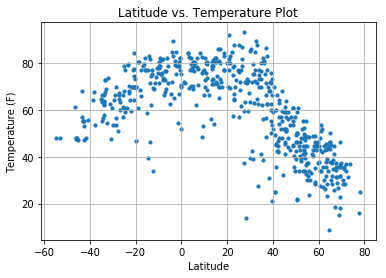

In [36]:
plt.scatter(city_data["Lat"], city_data["Max Temp"], marker="o", s=10)

plt.title("Latitude vs. Temperature Plot")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude_Temp_Plot.png")
plt.show()

 Latitude vs. Humidity Plot


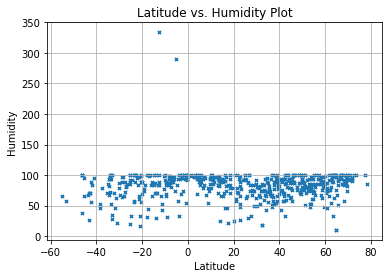

In [37]:
plt.scatter(city_data["Lat"], city_data["Humidity"], marker="x", s=10)

plt.title("Latitude vs. Humidity Plot")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude_Humidity_Plot.png")
plt.show()

 Latitude vs. Cloudiness Plot

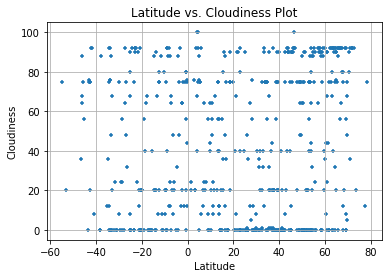

In [38]:
plt.scatter(city_data["Lat"], city_data["Cloudiness"], marker="+", s=10)

plt.title("Latitude vs. Cloudiness Plot")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude_Cloudiness_Plot.png")
plt.show()